<a href="https://colab.research.google.com/github/shalabh147/Brain-Tumor-Segmentation-and-Survival-Prediction-using-Deep-Neural-Networks/blob/master/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import tensorflow as tf
import keras.backend as K
import keras

from keras.models import Model, load_model
#from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,Maximum
#from keras.layers.core import Lambda, RepeatVector, Reshape
#from keras.layers.convolutional import Conv2D, Conv2DTranspose,Conv3D,Conv3DTranspose
#from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D,MaxPooling3D
#from keras.layers.merge import concatenate, add
#from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#from skimage.io import imread, imshow, concatenate_images
#from skimage.transform import resize

def standardize(image):

  standardized_image = np.zeros(image.shape)

  #
  
      # iterate over the `z` dimension
  for z in range(image.shape[2]):
      # get a slice of the image 
      # at channel c and z-th dimension `z`
      image_slice = image[:,:,z]

      # subtract the mean from image_slice
      centered = image_slice - np.mean(image_slice)
      
      # divide by the standard deviation (only if it is different from zero)
      if(np.std(centered)!=0):
          centered = centered/np.std(centered) 

      # update  the slice of standardized image
      # with the scaled centered and scaled image
      standardized_image[:, :, z] = centered

  ### END CODE HERE ###

  return standardized_image


def dice_coef(y_true, y_pred, epsilon=0.00001):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    
    """
    axis = (0,1,2,3)
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true*y_true, axis=axis) + K.sum(y_pred*y_pred, axis=axis) + epsilon
    return K.mean((dice_numerator)/(dice_denominator))

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)


import os
model = load_model('../input/evaluate-model/3d_model_4.h5',custom_objects = {'dice_coef_loss' : dice_coef_loss , 'dice_coef' : dice_coef})


In [ ]:
path = '../input/vs-brats2018/miccai_brats_2018_data_training/HGG'
all_images = os.listdir(path)
#print(len(all_images))
all_images.sort()
data = np.zeros((240,240,155,4))
image_data2=np.zeros((240,240,155))


In [ ]:
loss_list = []
accu_list = []
mean_loss = 0
mean_accu = 0
for image_num in range(180,210):
    #print(epochs)
    print(image_num)

# data preprocessing starts here

    x = all_images[image_num]
    print(x)
    folder_path = path + '/' + x;
    modalities = os.listdir(folder_path)
    modalities.sort()
    #data = []
    w = 0
    for j in range(len(modalities)):
      #print(modalities[j])
      
      image_path = folder_path + '/' + modalities[j]
      if not(image_path.find('seg.nii') == -1):
        img = nib.load(image_path);
        image_data2 = img.get_data()
        image_data2 = np.asarray(image_data2)
        print("Entered ground truth")
      else:
        img = nib.load(image_path);
        image_data = img.get_data()
        image_data = np.asarray(image_data)
        image_data = standardize(image_data)
        data[:,:,:,w] = image_data
        print("Entered modality")
        w = w+1
      
    print(data.shape)
    print(image_data2.shape)  

    reshaped_data=data[56:184,75:203,13:141,:]
    reshaped_data=reshaped_data.reshape(1,128,128,128,4)
    reshaped_image_data2=image_data2[56:184,75:203,13:141]

        
    reshaped_image_data2=reshaped_image_data2.reshape(1,128,128,128)
    reshaped_image_data2[reshaped_image_data2==4] = 3
    #hello = reshaped_image_data2.flatten()
    #y_to = keras.utils.to_categorical(y_to,num_classes=2)
    print(reshaped_image_data2.shape)
    #print(hello[hello==3].shape)
    #print("Number of classes",np.unique(hello))
    #class_weights = class_weight.compute_class_weight('balanced',np.unique(hello),hello)
    #print(class_weights)

    reshaped_image_data2 = keras.utils.to_categorical(reshaped_image_data2, num_classes = 4)

    print(reshaped_data.shape)
    print(reshaped_image_data2.shape)
    print(type(reshaped_data))
    
    scores = model.evaluate(x=reshaped_data,y=reshaped_image_data2)
    loss_list.append(scores[0])
    accu_list.append(scores[1])
    print(scores[1])
    mean_loss += scores[0]
    mean_accu += scores[1]
    
print(mean_loss/30)
print(mean_accu/30)



180
Brats18_TCIA04_343_1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


Entered modality
Entered ground truth


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)
<class 'numpy.ndarray'>
1/1 [==============================] - 6s 6s/step
0.38115882873535156
181
Brats18_TCIA04_361_1
Entered modality
Entered ground truth
Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)
<class 'numpy.ndarray'>
1/1 [==============================] - 6s 6s/step
0.8375815153121948
182
Brats18_TCIA04_437_1
Entered modality
Entered ground truth
Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)
<class 'numpy.ndarray'>
1/1 [==============================] - 6s 6s/step
0.3299141526222229
183
Brats18_TCIA04_479_1
Entered modality
Entered ground truth
Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155

Entered modality
Entered ground truth
Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)
<class 'numpy.ndarray'>
1/1 [==============================] - 6s 6s/step
0.45485469698905945
208
Brats18_TCIA08_436_1
Entered modality
Entered ground truth
Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)
<class 'numpy.ndarray'>
1/1 [==============================] - 6s 6s/step
0.8662452697753906
209
Brats18_TCIA08_469_1
Entered modality
Entered ground truth
Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)
<class 'numpy.ndarray'>
1/1 [==============================] - 6s 6s/step
0.866187334060669
0.2644708017508189
0.7355291972557704


Brats18_TCIA08_218_1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


Entered modality
Entered ground truth


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  from ipykernel import kernelapp as app


Entered modality
Entered modality
Entered modality
(240, 240, 155, 4)
(240, 240, 155)
(1, 128, 128, 128)
(1, 128, 128, 128, 4)
(1, 128, 128, 128)
<class 'numpy.ndarray'>


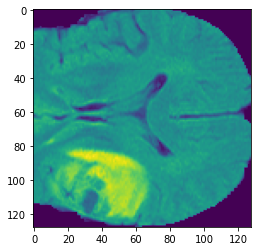

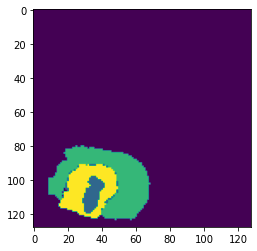

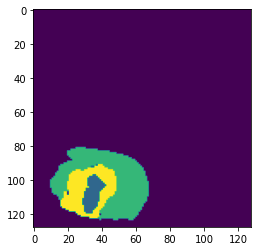

In [ ]:
x = all_images[201]
print(x)
folder_path = path + '/' + x;
modalities = os.listdir(folder_path)
modalities.sort()
data = np.zeros((240,240,155,4))
#data = []
w = 0
for j in range(len(modalities)):
  #print(modalities[j])

  image_path = folder_path + '/' + modalities[j]
  if not(image_path.find('seg.nii') == -1):
    img = nib.load(image_path);
    image_data2 = img.get_data()
    image_data2 = np.asarray(image_data2)
    print("Entered ground truth")
  else:
    img = nib.load(image_path);
    image_data = img.get_data()
    image_data = np.asarray(image_data)
    image_data = standardize(image_data)
    data[:,:,:,w] = image_data
    print("Entered modality")
    w = w+1

print(data.shape)
print(image_data2.shape)  

reshaped_data=data[56:184,75:203,13:141,:]
reshaped_data=reshaped_data.reshape(1,128,128,128,4)
reshaped_image_data2=image_data2[56:184,75:203,13:141]


reshaped_image_data2=reshaped_image_data2.reshape(1,128,128,128)
reshaped_image_data2[reshaped_image_data2==4] = 3
#hello = reshaped_image_data2.flatten()
#y_to = keras.utils.to_categorical(y_to,num_classes=2)
print(reshaped_image_data2.shape)
#print(hello[hello==3].shape)
#print("Number of classes",np.unique(hello))
#class_weights = class_weight.compute_class_weight('balanced',np.unique(hello),hello)
#print(class_weights)

#reshaped_image_data2 = keras.utils.to_categorical(reshaped_image_data2, num_classes = 4)

print(reshaped_data.shape)
print(reshaped_image_data2.shape)
print(type(reshaped_data))

Y_hat = model.predict(x=reshaped_data)
Y_hat = np.argmax(Y_hat,axis=-1)
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
img = reshaped_data[0,:,:,64,0]
imgplot = plt.imshow(img)
plt.show()

img2 = reshaped_image_data2[0,:,:,64]
imgplot2 = plt.imshow(img2)
plt.show()

img3 = Y_hat[0,:,:,64]
imgplot3 = plt.imshow(img3)
plt.show()

